# **Computational and Numerical Methods Lab - 3**

```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

# Newton-Raphson method

-> The Newton-Raphson method is a way to quickly find a good approximation for the root of a real-valued function f(x)=0. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it.

->Algorithm for Newton-Raphson method:
1. General formula:  $x_{n+1}$=$x_{n}$-$f(x_{n})/f^{'}(x_{n})$
2. We start with an initial point $x_{0}$.
3. Using the formula, keep on calculating subsequent $x_{n}$ till we get the desired accuracy.
4. In newton raphson, error decreases with square term/in quadratic manner i.e $Re(x_{n+1}) = Re(x_n)*M$ while in bisection error decreases by a factor of 2 every time $|b - x_{n+1}| = |(b - x_{n})/2|$ 


In [1]:
import numpy as np
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
err = 1e-7

# Q1)
 **$$f(x)=x^{6}-x-1$$**

In [3]:
def fun(x):
    return x**6 - x - 1

def dfun(x):
    return 6*(x**5) - 1

def newton_raphson(x0,err):
    data = []
    roots = []
    error = []
    present = x0
    fpresent = fun(x0)
    dfpresent = dfun(x0)
    next = present-(fpresent/dfpresent)
    roots.append(present)
    i = 1
    while(abs(next - present) > err):
        prev = present
        present = next
        fpresent = fun(present)
        dfpresent = dfun(present)
        next = present-(fpresent/dfpresent)
        data.append([i,present,fpresent,next,present - prev])
        roots.append(present)
        error.append(abs(present - prev))
        i += 1
    alpha = next
    data.append([i,next,fun(next),next - (fun(next)/dfun(next)),next - present])
    error.append(next- present)
    for i in range(0,len(data)):
        data[i].append(alpha - roots[i])
    
    df = pd.DataFrame(data,columns =['iter', 'x\u2099', 'f(x\u2099)', 'x\u2099\u208a\u2081', 'x\u2099 - x\u2099\u208b\u2081', 'a - x\u2099\u208b\u2081'])
    iter = np.arange(1,len(error)+1,1)
    plt.figure(1)
    plt.plot(iter,error,label = 'root = ' + str(roots[-1]))
    plt.legend()
    plt.xlabel('Iteration No.')
    plt.ylabel('Error')
    plt.title('Error vs Iteration Graph')
    plt.grid(True)
    plt.plot()
    plt.figure(2)
    r = [roots[-1]]*len(iter)
    plt.plot(iter,roots,label = '$x_n$')
    plt.plot(iter,r,label = 'root')
    plt.legend()
    plt.xlabel('Iteration No.')
    plt.ylabel('$x_n$')
    plt.title('Convergence of x towards the root')
    plt.grid(True)
    plt.plot()

    return df


,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,1.300491,2.537264e+00,1.181480,-1.995091e-01,-3.652759e-01
1,2,1.181480,5.384586e-01,1.139456,-1.190105e-01,-1.657667e-01
2,3,1.139456,4.923525e-02,1.134778,-4.202483e-02,-4.675628e-02
3,4,1.134778,5.503239e-04,1.134724,-4.677965e-03,-4.731452e-03
4,5,1.134724,7.113585e-08,1.134724,-5.347992e-05,-5.348684e-05
5,6,1.134724,1.554312e-15,1.134724,-6.914698e-09,-6.914698e-09


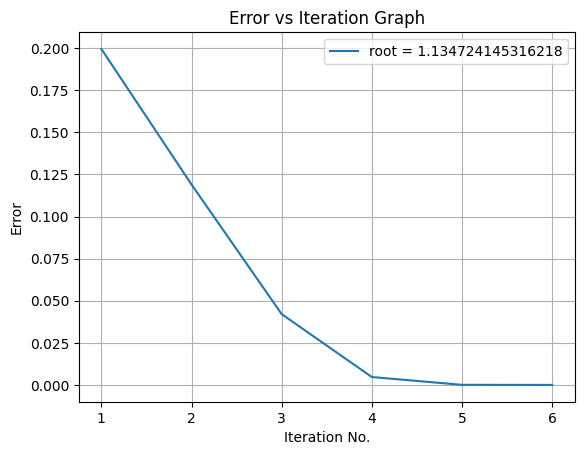

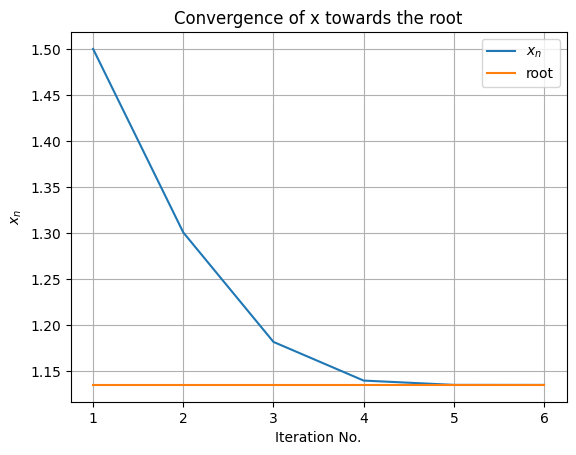

In [4]:
df = newton_raphson(1.5,err)
df



,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,-0.857143,2.537123e-01,-0.789952,1.428571e-01,2.219104e-01
1,2,-0.789952,3.295042e-02,-0.778373,6.719101e-02,7.905326e-02
2,3,-0.778373,7.680138e-04,-0.778090,1.157914e-02,1.186225e-02
3,4,-0.778090,4.406060e-07,-0.778090,2.829499e-04,2.831125e-04
4,5,-0.778090,1.452172e-13,-0.778090,1.625135e-07,1.625136e-07
5,6,-0.778090,2.220446e-16,-0.778090,5.351275e-14,5.351275e-14


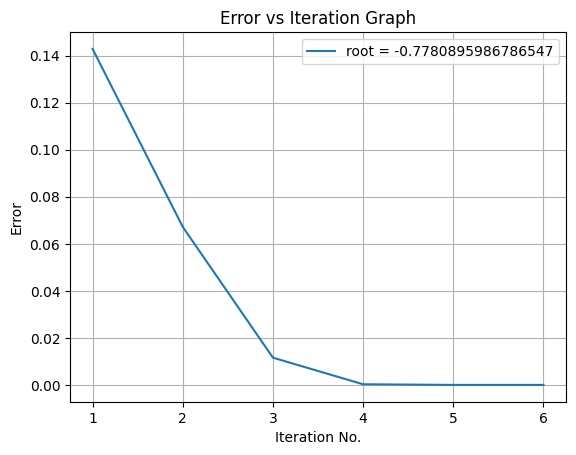

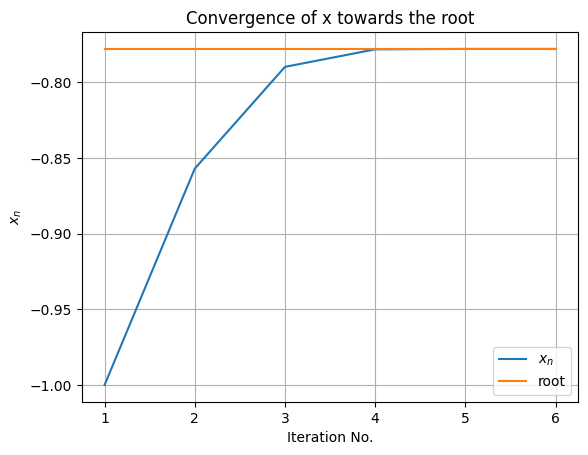

In [5]:
df = newton_raphson(-1,err)
df

Result:
1. For the initial point 1.5 the root is  1.134724145316218.
2. For the initial point -1 the root is -0.7780895986786547.

# Q2)

**$$f(x) = x^{3}-x^{2}-x-1$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,1.857143,9.912536e-02,1.839545,-1.428571e-01,-1.607132e-01
1,2,1.839545,1.410329e-03,1.839287,-1.759834e-02,-1.785610e-02
2,3,1.839287,3.000700e-07,1.839287,-2.577034e-04,-2.577582e-04
3,4,1.839287,1.376677e-14,1.839287,-5.485386e-08,-5.485386e-08


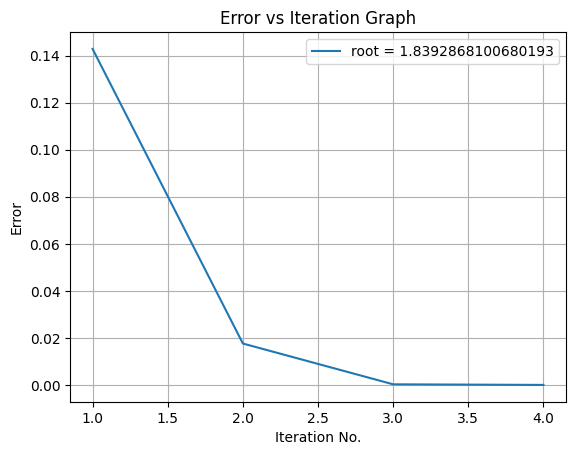

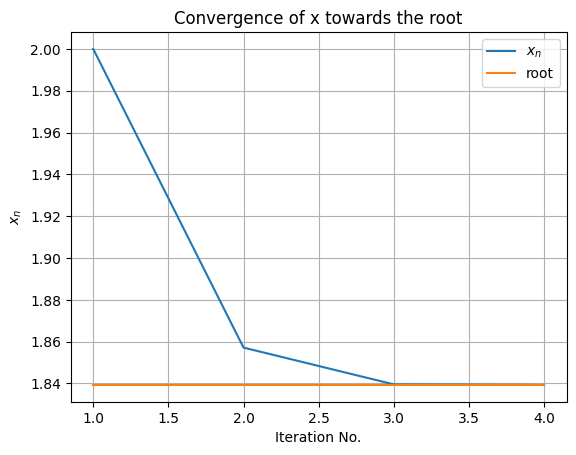

In [6]:
def fun(x):
    return x**3 - x**2 - x - 1
def dfun(x):
    return 3*x**2 - 2*x - 1
df = newton_raphson(2,err)
df

Result:
1. For the initial point 2,the root is 1.8392868100680193

**$$f(x) = 1 + 0.3*cos(x) $$**


,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,1.300000,-2.197504e-01,1.129528,1.300000e+00,1.128425e+00
1,2,1.129528,-1.401569e-03,1.128425,-1.704723e-01,-1.715749e-01
2,3,1.128425,-7.792977e-08,1.128425,-1.102501e-03,-1.102562e-03
3,4,1.128425,-2.220446e-16,1.128425,-6.130788e-08,-6.130788e-08


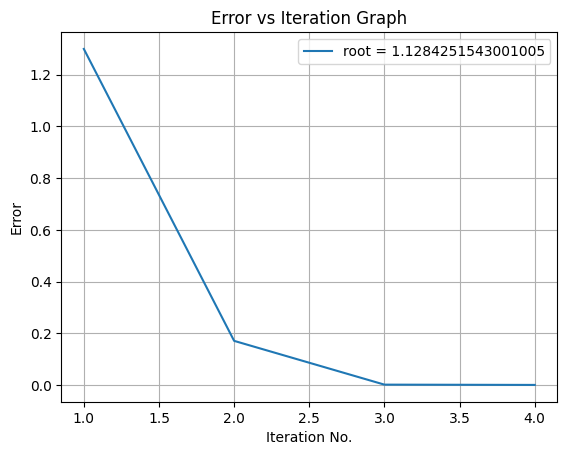

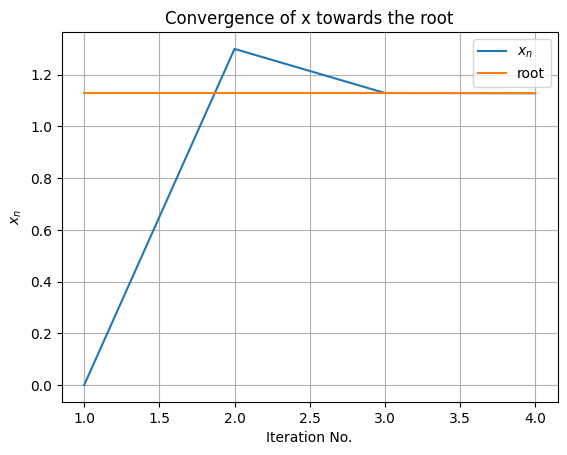

In [7]:
def fun(x):
    return 1 + 0.3*np.cos(x) - x
def dfun(x):
    return -1 - 0.3*np.sin(x)

df = newton_raphson(0,err)
df

Result:
1. For the initial point 0,the root is 1.1284251543001005.

**$$f(x)= sin(x) + 1/2 - cos(x)$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,0.500000,1.018430e-01,0.424950,5.000000e-01,4.240310e-01
1,2,0.424950,1.216351e-03,0.424031,-7.504965e-02,-7.596896e-02
2,3,0.424031,2.108693e-07,0.424031,-9.191557e-04,-9.193151e-04
3,4,0.424031,6.328271e-15,0.424031,-1.594022e-07,-1.594022e-07
4,5,0.424031,0.000000e+00,0.424031,-4.773959e-15,-4.773959e-15


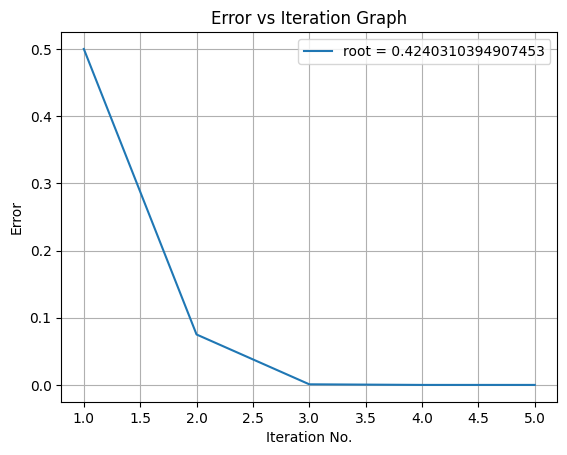

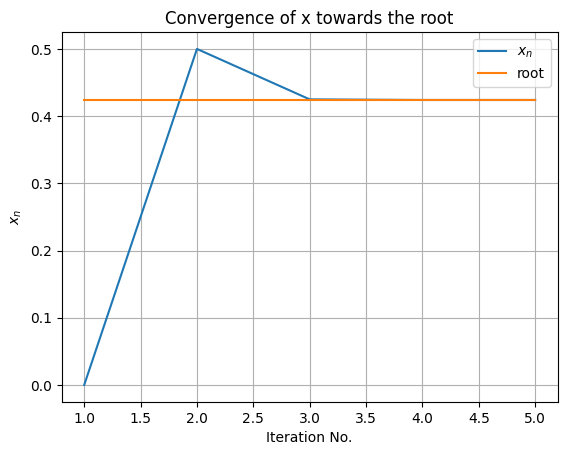

In [8]:
def fun(x):
    return 0.5 + np.sin(x) - np.cos(x)

def dfun(x):
    return np.cos(x) + np.sin(x)
df = newton_raphson(0,err)
df

Result:
1. For the initial point 0,the root is 0.42403103949074533

**$$ f(x) = e^{-x} - x$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,0.537883,4.610049e-02,0.566987,-4.621172e-01,-4.328567e-01
1,2,0.566987,2.449499e-04,0.567143,2.910415e-02,2.926045e-02
2,3,0.567143,6.927809e-09,0.567143,1.562946e-04,1.562990e-04
3,4,0.567143,0.000000e+00,0.567143,4.420661e-09,4.420661e-09


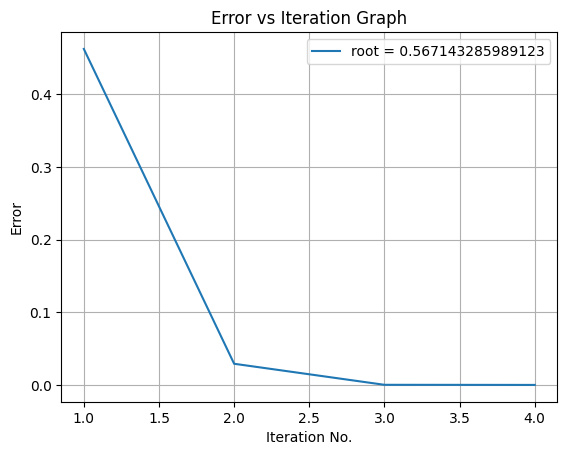

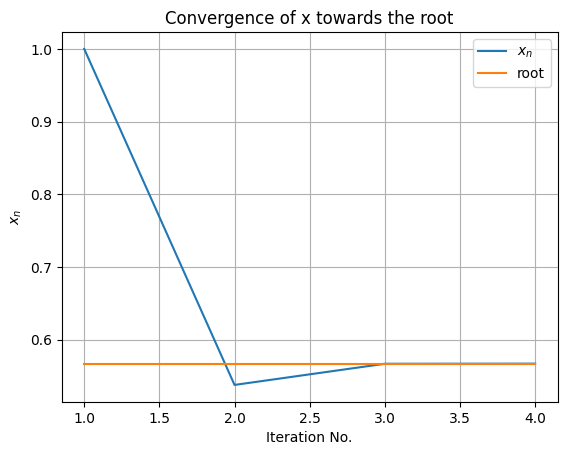

In [9]:
def fun(x):
    return np.exp(-x) - x

def dfun(x):
    return -1 - np.exp(-x)
df = newton_raphson(1,err)
df

Result:
1. For the initial point 1,the root is 0.537143285989123

**$$ f(x) = e^{-x} - sin(x)$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,0.478528,1.592222e-01,0.584157,-5.214722e-01,-4.114673e-01
1,2,0.584157,6.079306e-03,0.588525,1.056292e-01,1.100050e-01
2,3,0.588525,1.058452e-05,0.588533,4.368093e-03,4.375725e-03
3,4,0.588533,3.233336e-11,0.588533,7.631751e-06,7.631774e-06
4,5,0.588533,0.000000e+00,0.588533,2.331346e-11,2.331346e-11


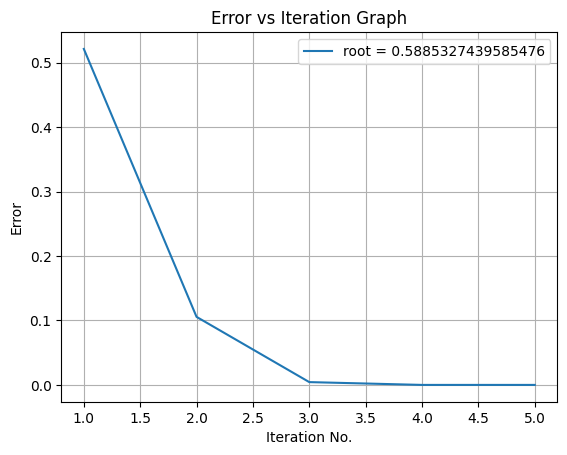

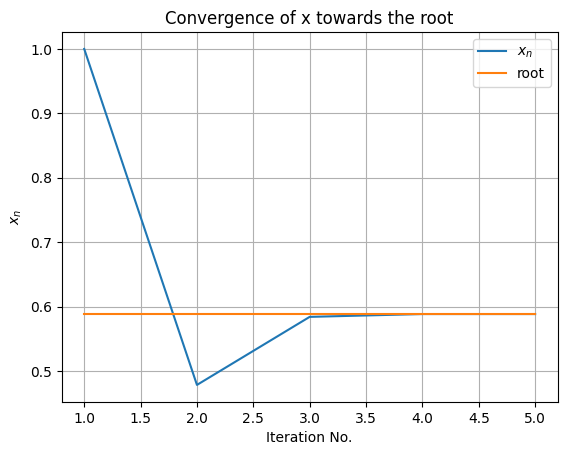

In [10]:
def fun(x):
    return np.exp(-x) - np.sin(x)
def dfun(x):
    return -np.exp(-x) - np.cos(x)
df = newton_raphson(1,err)
df

Result:
1. For the initial point 1,the root is 0.5885327439585476

**$$ f(x) = x^3 - 2x - 2$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,4.000000,5.400000e+01,3.715789,3.000000e+00,7.692924e-01
1,2,3.715789,4.187267e+01,3.440153,-2.842105e-01,-2.230708e+00
2,3,3.440153,3.183272e+01,3.175188,-2.756363e-01,-1.946497e+00
3,4,3.175188,2.366128e+01,2.923565,-2.649656e-01,-1.670861e+00
4,5,2.923565,1.714127e+01,2.688642,-2.516222e-01,-1.405895e+00
5,6,2.688642,1.205835e+01,2.474487,-2.349239e-01,-1.154273e+00
6,7,2.474487,8.202531e+00,2.285726,-2.141540e-01,-9.193491e-01
7,8,2.285726,5.370425e+00,2.126958,-1.887613e-01,-7.051951e-01
8,9,2.126958,3.368340e+00,2.001586,-1.587679e-01,-5.164338e-01
9,10,2.001586,2.015878e+00,1.910193,-1.253720e-01,-3.576659e-01


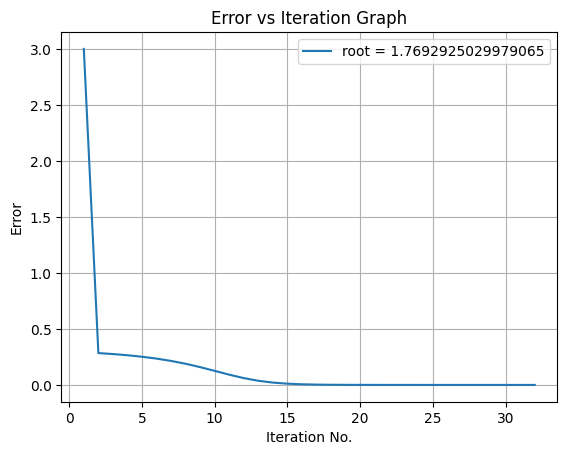

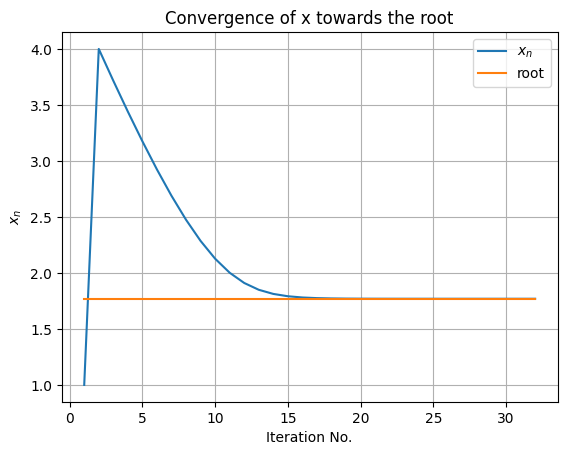

In [11]:
def fun(x):
    return x**3 - 2*x - 2
def dfun(x):
    return 3*x**3 - 2
df = newton_raphson(1,err)
df

Result:
1. For the initial point 1,the root is 1.7692925029979065

**$$ f(x) = x^4 - x - 1$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,1.333333,8.271605e-01,1.235808,3.333333e-01,2.207441e-01
1,2,1.235808,9.659633e-02,1.221059,-9.752547e-02,-1.125892e-01
2,3,1.221059,1.977478e-03,1.220744,-1.474887e-02,-1.506378e-02
3,4,1.220744,8.862016e-07,1.220744,-3.147685e-04,-3.149097e-04
4,5,1.220744,1.789680e-13,1.220744,-1.411893e-07,-1.411893e-07
5,6,1.220744,4.440892e-16,1.220744,-2.842171e-14,-2.842171e-14


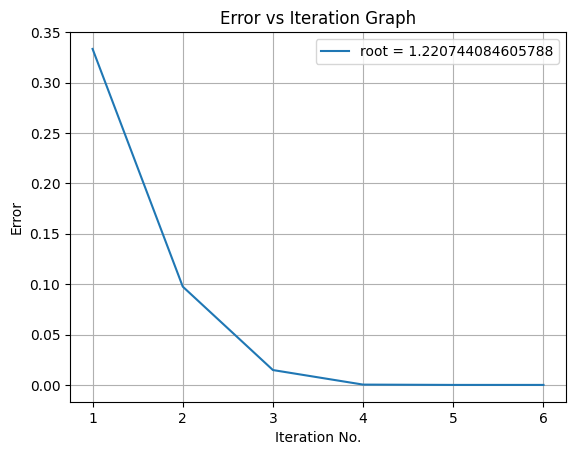

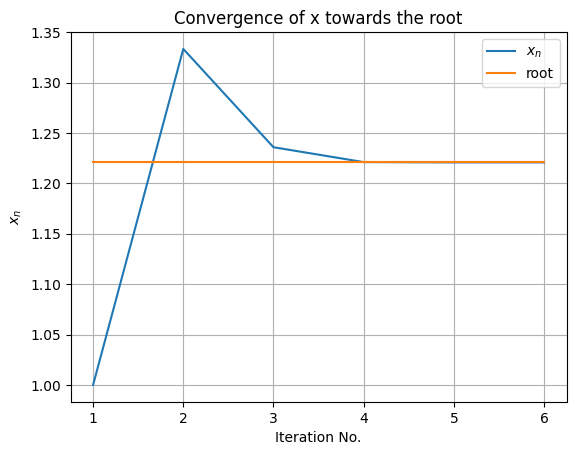

In [12]:
def fun(x):
    return x**4 - x - 1
def dfun(x):
    return 4*x**3 - 1
df = newton_raphson(1,err)
df

Result:
1. For the initial point 1,the root is 1.220744084605788

**$$ f(x) = tan(x) - x$$**

,iter,xₙ,f(xₙ),xₙ₊₁,xₙ - xₙ₋₁,a - xₙ₋₁
0,1,7.701903e-01,1.998473e-01,5.578066e-01,-2.298097e-01,-9.999998e-01
1,2,5.578066e-01,6.609158e-02,3.880140e-01,-2.123837e-01,-7.701901e-01
2,3,3.880140e-01,2.072125e-02,2.639827e-01,-1.697926e-01,-5.578064e-01
3,4,2.639827e-01,6.307930e-03,1.776401e-01,-1.240314e-01,-3.880139e-01
4,5,1.776401e-01,1.892427e-03,1.189273e-01,-8.634258e-02,-2.639825e-01
5,6,1.189273e-01,5.638804e-04,7.943465e-02,-5.871283e-02,-1.776399e-01
6,7,7.943465e-02,1.674967e-04,5.300103e-02,-3.949260e-02,-1.189271e-01
7,8,5.300103e-02,4.968439e-05,3.534726e-02,-2.643362e-02,-7.943447e-02
8,9,3.534726e-02,1.472865e-05,2.356877e-02,-1.765377e-02,-5.300084e-02
9,10,2.356877e-02,4.365015e-06,1.571367e-02,-1.177849e-02,-3.534707e-02


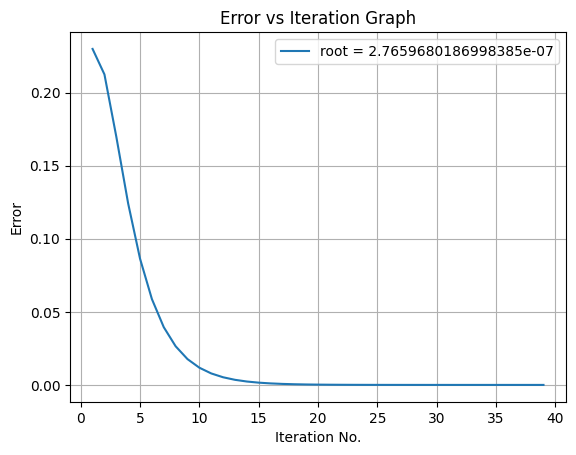

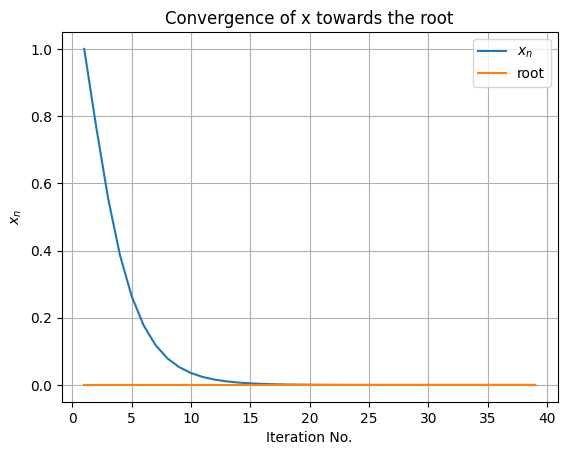

In [13]:
def fun(x):
    return np.tan(x) - x
def dfun(x):
    return (1/(np.cos(x)**2))- 1
df = newton_raphson(1,err)
df

Result:
1. For the initial point 1,the root is 2.7659680186998385e-07

# Q4)

**$$f(x) = a + x(x-1)^2 $$**

[]

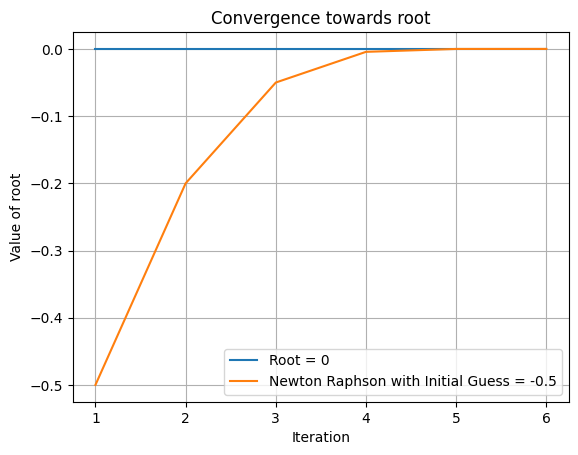

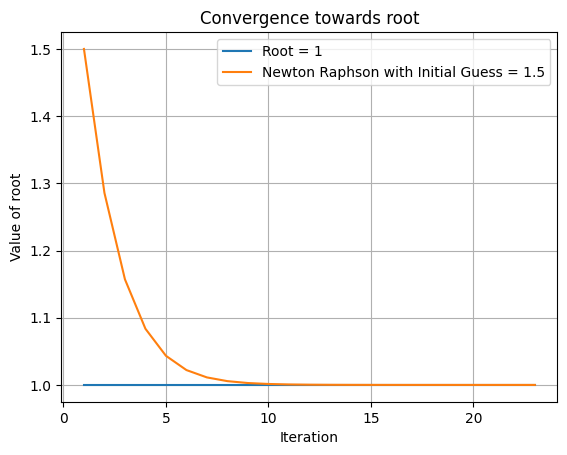

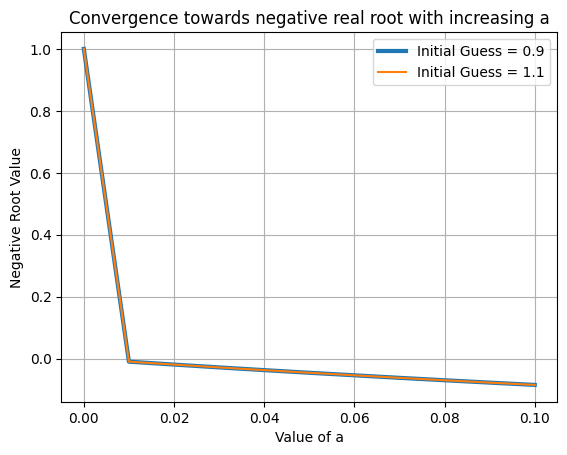

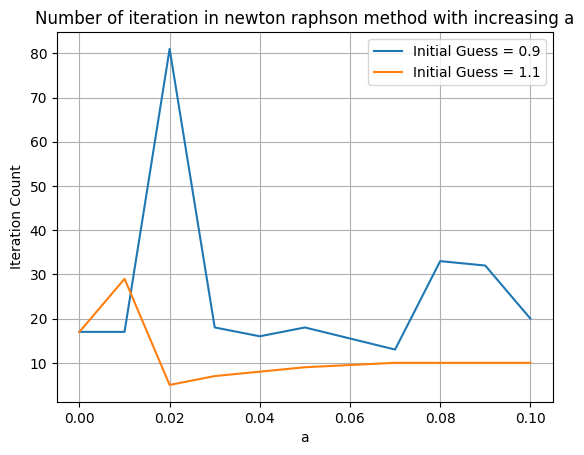

In [27]:
def newton_raphson(a,x0,err):
    roots = []
    present = x0
    fpresent = fun(a,x0)
    dfpresent = dfun(x0)
    next = present-(fpresent/dfpresent)
    roots.append(present)
    i = 1
    while(abs(next - present) > err):
        prev = present
        present = next
        fpresent = fun(a,present)
        dfpresent = dfun(present)
        next = present-(fpresent/dfpresent)
        roots.append(present)
        i += 1
    return roots

def fun(a,x):
    return a + x*((x-1)**2)
def dfun(x):
    return (x-1)**2 + 2*x*(x-1)

root0 = newton_raphson(0,-0.5,err)
root1 = newton_raphson(0,1.5,err)
r0 = [0]*len(root0)
r1 = [1]*len(root1)
iter0 = np.arange(1,len(root0)+1,1)
iter1 = np.arange(1,len(root1)+1,1)
plt.figure(1)
plt.plot(iter0,r0,label = 'Root = 0')
plt.plot(iter0,root0,label = 'Newton Raphson with Initial Guess = -0.5')
plt.legend()
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Value of root')
plt.title('Convergence towards root')
plt.plot()

plt.figure(2)
plt.plot(iter1,r1,label = 'Root = 1')
plt.plot(iter1,root1,label = 'Newton Raphson with Initial Guess = 1.5')
plt.legend()
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Value of root')
plt.title('Convergence towards root')
plt.plot()
a_val = [0,0.01,0.02,0.03,0.04,0.05,0.07,0.08,0.09,0.1]
roots0 = []
iter0 = []
roots1 = []
iter1 = []

for a in a_val:
    x = newton_raphson(a,0.99,err)
    roots0.append(x[-1])
    iter0.append(len(x))

for a in a_val:
    x = newton_raphson(a,1.01,err)
    roots1.append(x[-1])
    iter1.append(len(x))

plt.figure(3)
plt.plot(a_val,roots0,label = 'Initial Guess = ' + str(0.9),linewidth = 3)
plt.plot(a_val,roots1,label = 'Initial Guess = ' + str(1.1))
plt.legend()
plt.grid(True)
plt.xlabel('Value of a')
plt.ylabel('Negative Root Value')
plt.title('Convergence towards negative real root with increasing a')
plt.plot()

plt.figure(4)
plt.plot(a_val,iter0,label = 'Initial Guess = ' + str(0.9))
plt.plot(a_val,iter1,label = 'Initial Guess = ' + str(1.1))
plt.legend()
plt.grid(True)
plt.xlabel('a')
plt.ylabel('Iteration Count')
plt.title('Number of iteration in newton raphson method with increasing a')
plt.plot()

Result:
1. We notice, with increasing value of a , we can see the convergence towards the negative root of the function.
2. We also notice the relation between a and number of iterations to find the root are directly proportional.